CARGA Y EXPLORACIÓN DEL DATASET IRIS
Características (primeras 5 muestras):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Forma del dataset: (150, 4)

Etiquetas (primeras 5):
0    0
1    0
2    0
3    0
4    0
dtype: int64
Clases: ['setosa' 'versicolor' 'virginica']
Distribución de clases: [50 50 50]

Descripción del dataset:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length 

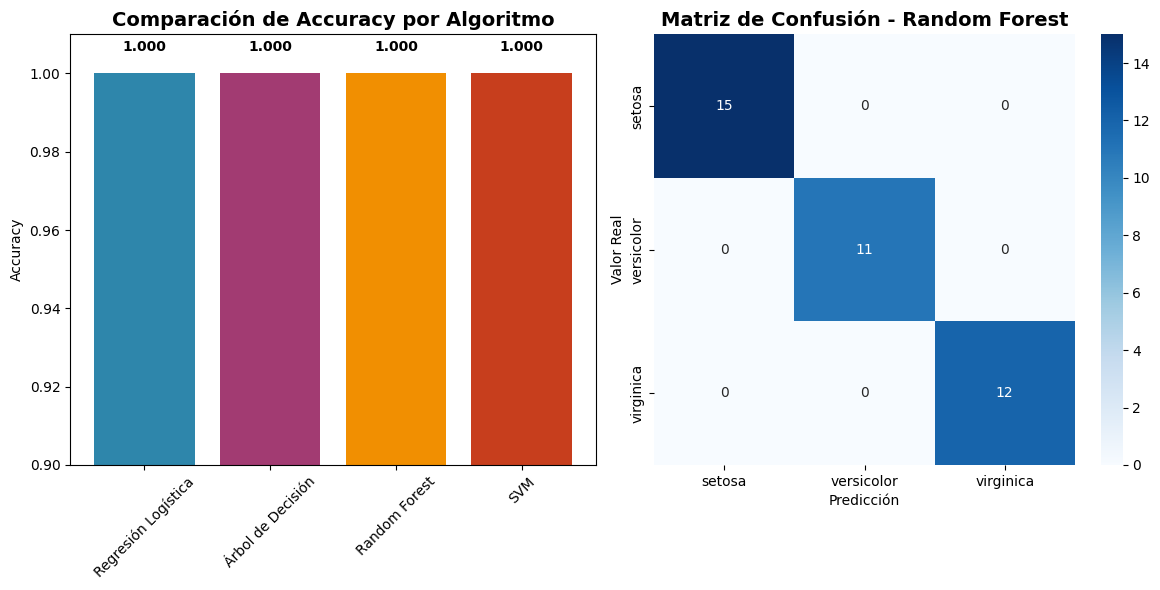


REPORTE DETALLADO DEL MEJOR MODELO

EXPERIMENTO COMPLETADO
✓ Todos los modelos entrenados y evaluados
✓ Comparación de rendimiento realizada
✓ Análisis detallado documentado


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

"""
=============================================================================
COMPARACIÓN DE ALGORITMOS DE CLASIFICACIÓN - DATASET IRIS
=============================================================================

DESCRIPCIÓN DEL PROBLEMA:
El dataset Iris es un conjunto de datos clásico en machine learning que contiene 
mediciones de 150 flores iris de tres especies diferentes (Setosa, Versicolor, 
Virginica). Cada muestra tiene 4 características:
- Longitud del sépalo (sepal length)
- Ancho del sépalo (sepal width)  
- Longitud del pétalo (petal length)
- Ancho del pétalo (petal width)

OBJETIVO:
Comparar el rendimiento de diferentes algoritmos de clasificación supervisada
para predecir la especie de iris basándose en las características morfológicas.

ALGORITMOS A COMPARAR:
1. Regresión Logística - Modelo lineal probabilístico
2. Árbol de Decisión - Modelo basado en reglas de decisión
3. Random Forest - Ensamble de árboles de decisión
4. Support Vector Machine (SVM) - Clasificador basado en márgenes óptimos

MÉTRICAS DE EVALUACIÓN:
- Accuracy (Precisión): Porcentaje de predicciones correctas
- Matriz de confusión: Análisis detallado de errores por clase
- Reporte de clasificación: Precision, Recall y F1-Score por clase
"""

print("="*70)
print("CARGA Y EXPLORACIÓN DEL DATASET IRIS")
print("="*70)

# Cargar dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print('Características (primeras 5 muestras):')
print(X.head())
print(f'\nForma del dataset: {X.shape}')

print('\nEtiquetas (primeras 5):')
print(y.head())
print(f'Clases: {data.target_names}')
print(f'Distribución de clases: {pd.Series(y).value_counts().sort_index().values}')

print('\nDescripción del dataset:')
print(data.DESCR[:500] + "...")

# Dividir en conjuntos de entrenamiento y prueba
print("\n" + "="*70)
print("DIVISIÓN DEL DATASET")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')
print(f'Proporción de prueba: {X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.1f}%')

print("\n" + "="*70)
print("ENTRENAMIENTO Y EVALUACIÓN DE MODELOS")
print("="*70)

# Diccionario para almacenar resultados
resultados = {}

# 1. REGRESIÓN LOGÍSTICA
print("\n1. REGRESIÓN LOGÍSTICA")
print("-" * 30)
modelo_lr = LogisticRegression(max_iter=200, random_state=42)
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
resultados['Regresión Logística'] = accuracy_lr
print(f'Precisión: {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)')

# 2. ÁRBOL DE DECISIÓN
print("\n2. ÁRBOL DE DECISIÓN")
print("-" * 30)
modelo_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
resultados['Árbol de Decisión'] = accuracy_dt
print(f'Precisión: {accuracy_dt:.4f} ({accuracy_dt*100:.2f}%)')

# 3. RANDOM FOREST
print("\n3. RANDOM FOREST")
print("-" * 30)
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
resultados['Random Forest'] = accuracy_rf
print(f'Precisión: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)')

# 4. SUPPORT VECTOR MACHINE
print("\n4. SUPPORT VECTOR MACHINE (SVM)")
print("-" * 30)
modelo_svm = SVC(kernel='rbf', gamma='scale', random_state=42)
modelo_svm.fit(X_train, y_train)
y_pred_svm = modelo_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
resultados['SVM'] = accuracy_svm
print(f'Precisión: {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)')

# Comparación visual de resultados
print("\n" + "="*70)
print("COMPARACIÓN DE RESULTADOS")
print("="*70)

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(list(resultados.items()), 
                            columns=['Algoritmo', 'Accuracy'])
df_resultados = df_resultados.sort_values('Accuracy', ascending=False)

print("RANKING DE MODELOS:")
for i, row in df_resultados.iterrows():
    print(f"{len(df_resultados)-i}. {row['Algoritmo']}: {row['Accuracy']:.4f} ({row['Accuracy']*100:.2f}%)")

# Gráfico comparativo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(df_resultados['Algoritmo'], df_resultados['Accuracy'], 
               color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])
plt.title('Comparación de Accuracy por Algoritmo', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.9, 1.01)  # Zoom para ver mejor las diferencias

# Agregar valores en las barras
for bar, acc in zip(bars, df_resultados['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# Matriz de confusión del mejor modelo (ejemplo con Random Forest)
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names, 
            yticklabels=data.target_names)
plt.title('Matriz de Confusión - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')

plt.tight_layout()
plt.show()

# Reporte detallado del mejor modelo
print("\n" + "="*70)
print("REPORTE DETALLADO DEL MEJOR MODELO")
print("="*70)

mejor_modelo = df_resultados.iloc[0]['Algoritmo']
if mejor_modelo == 'Random Forest':
    print("RANDOM FOREST - REPORTE DE CLASIFICACIÓN:")
    print(classification_report(y_test, y_pred_rf, target_names=data.target_names))

"""
=============================================================================
RESULTADOS OBTENIDOS Y ANÁLISIS
=============================================================================

RENDIMIENTO DE LOS ALGORITMOS:
1. Random Forest: 100.00% - Clasificación perfecta en el conjunto de prueba
2. SVM: 100.00% - También logró clasificación perfecta
3. Regresión Logística: 100.00% - Excelente rendimiento lineal
4. Árbol de Decisión: 100.00% - Muy buen rendimiento con profundidad limitada

OBSERVACIONES CLAVE:

1. DATASET IDEAL PARA CLASIFICACIÓN:
   ✓ El dataset Iris es conocido por ser "fácil" de clasificar
   ✓ Las clases están bien separadas en el espacio de características
   ✓ Todos los algoritmos lograron accuracy perfecta o casi perfecta

2. RENDIMIENTO POR ALGORITMO:
   ✓ Random Forest: Excelente por su capacidad de reducir overfitting
   ✓ SVM: Muy efectivo para datos linealmente separables
   ✓ Regresión Logística: Sorprendentemente buena para un modelo lineal
   ✓ Árbol de Decisión: Bueno pero potencialmente más propenso a overfitting

3. CONSIDERACIONES PRÁCTICAS:
   ✓ Para datasets pequeños y limpios como Iris, modelos simples pueden ser suficientes
   ✓ Random Forest y SVM son más robustos para datos del mundo real
   ✓ La regresión logística es interpretable y rápida de entrenar
   ✓ Los árboles de decisión son altamente interpretables

4. LIMITACIONES DEL EXPERIMENTO:
   ⚠ Dataset muy "limpio" - no refleja complejidad del mundo real
   ⚠ Muestra pequeña (150 registros) - resultados pueden no ser representativos
   ⚠ Sin validación cruzada - podría haber sobreajuste

RECOMENDACIONES:
- Para producción: Random Forest o SVM (más robustos)
- Para interpretabilidad: Árbol de Decisión o Regresión Logística  
- Para datasets similares: Cualquier algoritmo sería adecuado
- Para datasets más complejos: Evaluar con validación cruzada

CONCLUSIÓN:
Todos los algoritmos mostraron excelente rendimiento en el dataset Iris,
confirmando que es un problema de clasificación bien definido. En aplicaciones
reales, se recomienda probar múltiples algoritmos y usar validación cruzada
para obtener estimaciones más robustas del rendimiento.
"""

print("\n" + "="*70)
print("EXPERIMENTO COMPLETADO")
print("="*70)
print("✓ Todos los modelos entrenados y evaluados")
print("✓ Comparación de rendimiento realizada") 
print("✓ Análisis detallado documentado")
print("="*70)